# ESCI 445 - Programming Exercise 4-3

### Modeling the 1D Advection Equation Using the Forward-in-time, Backward-in-space Scheme

Variables

+ nx: number of x data points
+ ny: number of y data points
+ dx: $\Delta x$, spacing between data points (meters)
+ dt: $\Delta t$, time interval (seconds)
+ c: speed of advection (either wind speed or wave speed)
+ u: parameter being advected
+ u_now: value of <i>u</i> at current time step
+ u_new: value of <i>u</i> at next time step

The 1D advection equation is $\dfrac{\partial u}{\partial t}+c\dfrac{\partial u} {\partial x}=0$.  This notebook will show the steps for how to model this equation using the forward-in-time, backward-in-space scheme for positive values of <i>c</i>.

### Import libraries

In [1]:
import numpy as np   # Import numerical python aliased to np
import matplotlib.pyplot as plt  # Import matplotlib pyplot aliased to plt
from matplotlib import rcParams

### Define fixed model parameters

In [2]:
### 
dx = 1e3  #  Grid spacing in meters
dt = 30.0  # Time interval in seconds
nx = 601   #  Number of grid points
n_total = 500  # Final time index at end of simulation
n_save = 10   #  Number of iterations between saves
x = np.arange(0,nx)*dx/1000.0  #  Grid values (in kilometers)

### Define user-specified model parameters

In [3]:
width = 20   #  Signal width in grid points
c = 15.0   # Speed of wave in meters per second

### Define arrays holding the solution values

In [4]:
u_now = np.zeros(nx, dtype = np.float_)  #  Value at current time step
u_next = np.zeros_like(u_now)  #  Value at next time step
u_past = np.zeros_like(u_now)  #  Value at next time step
u = np.zeros((0, nx), dtype = np.float_)  # define a variable to hold the output values

### Initialize the solution at time zero.

In [5]:
Gaussian = False  # If true, initial data is Gaussian.  Otherwise, it is rectangel

if Gaussian:
    std = 6.0  # number of gridpoints for standard deviation
    arg = ((nx/2-np.arange(0,nx))**2)/(4*std**2)
    u_now[0:nx] = np.exp(-arg)
else:
    width = 20   #  Signal width
    start, stop = int(nx/2) - int(width/2), int(nx/2) + int(width/2)
    u_now[start:stop] = 1.0

u = np.vstack((u, u_now))    #  Saves initial data for output

In [6]:
n = 0
sigma = c*dt/dx  # Defined here so it isn't in the loop

if c>=0:
    for i in range (1,nx):
        u_next[i] = u_now[i] - sigma * (u_now[i] - u_now[i-1])
else:
    for i in range(0,nx-1):
        u_next[i] = u_now[i] - sigma * (u_now[i+1] - u_now[i])

u_past = np.copy(u_now)
u_now = np.copy(u_next)

### <font color = 'blue'>Main loop over time, with nested loop over grid

In [7]:
sigma = c*dt/dx  # Defined here so it isn't in the loop

for n in range(1, n_total): # start of time loop
    for i in range(1,nx-1):
        u_next[i] = u_past[i] - sigma * (u_now[i+1] - u_now[i-1])
    
    #swap the vars
    u_past = np.copy(u_now)   
    u_now = np.copy(u_next)

    # Prints out amplitude of signal
    print(n+1, np.max(abs(u_now)))
    
    # Save output
    if (n+1) % n_save == 0:
        u = np.vstack((u, u_now))

2 1.2475
3 1.2475
4 1.23326875
5 1.23326875
6 1.216198125
7 1.25001126562
8 1.25001126562
9 1.22656232285
10 1.2486184454
11 1.2486184454
12 1.24409163545
13 1.23982753813
14 1.25897736756
15 1.25897736756
16 1.22469911343
17 1.26750804085
18 1.26750804085
19 1.20353091735
20 1.26822277837
21 1.26822277837
22 1.23195871354
23 1.2607415961
24 1.2607415961
25 1.25512491088
26 1.2453120006
27 1.26752937642
28 1.26752937642
29 1.22259478973
30 1.26953335067
31 1.26953335067
32 1.24143394961
33 1.26177937992
34 1.26177937992
35 1.26128764144
36 1.24515296936
37 1.27003515752
38 1.27003515752
39 1.23074068526
40 1.26828594989
41 1.26828594989
42 1.25499524723
43 1.2568792081
44 1.26813998363
45 1.26813998363
46 1.23685958674
47 1.27064158755
48 1.27064158755
49 1.24998509105
50 1.26320948885
51 1.26588148708
52 1.26588148708
53 1.24677369377
54 1.27126882314
55 1.27126882314
56 1.24644647479
57 1.2667232023
58 1.2667232023
59 1.26396813738
60 1.2530516428
61 1.27123742538
62 1.27123742538
63

### Save output file for later use.  Output can be viewed separately using the program View-1D.py

In [8]:
np.save('fit-bis', u) # Saves output as NumPy array file

### Plot output

<IPython.core.display.Javascript object>


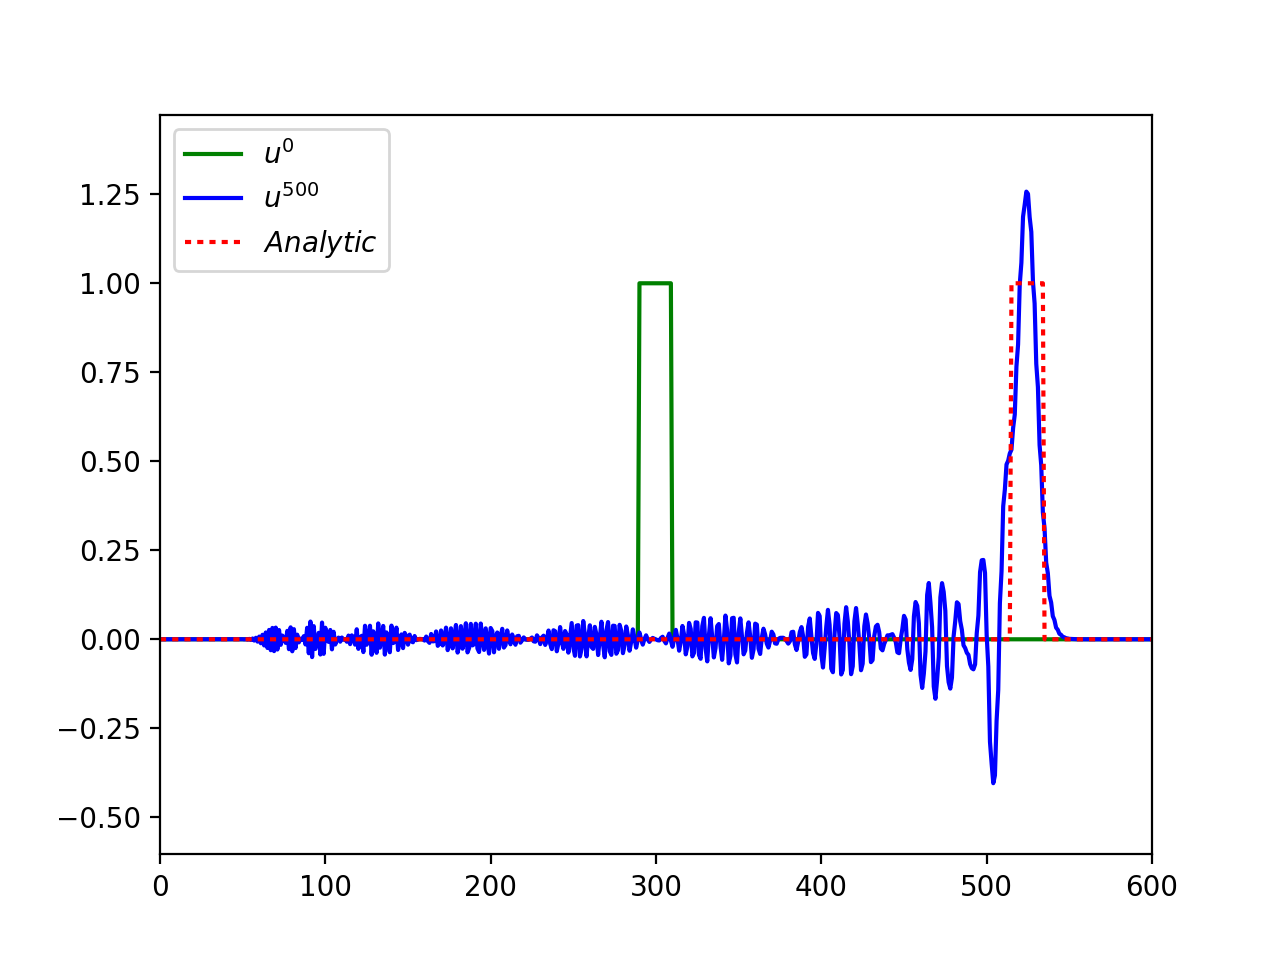

In [9]:
inline = True  # True for inline plot, False for interactive
if inline:
    %matplotlib notebook
else:
    %matplotlib
    
s = r'$u^{' + str(n_total) + r'}$'
plt.plot(x, u[0,:], 'g-',label = r'$u^0$')
plt.plot(x, u[-1,:], 'b-',label = s)
plt.xlim(x[0],x[-1])
umin, umax = np.min(u), np.max(u)
plt.ylim(umin-0.2, umax+0.2)

# Create actual solution for comparison
displacement = c*dt*n_total  # distance signal is displaced
nindex = int(displacement/dx)  # number of grid points signal is displaced
plt.plot(x, np.roll(u[0,:], nindex), 'r:', label = r'$Analytic$')

plt.legend((r'$u^0$', s, r'$Analytic$'), loc = 0)
plt.show()